In [12]:
import numpy as np
import serial 
import matplotlib.pyplot as plt
%matplotlib widget


In [13]:
def aEntero32(secuencia):
    si = iter(secuencia)
    
    try: 
        while(True):
            yield int.from_bytes(bytes([next(si) for _ in range(4)]), 'little')
    except StopIteration as e:
        pass

In [14]:
lecturas = []
with serial.Serial("COM6") as s:
    for _ in range(10):
        lecturas.append(np.array(list(aEntero32(s.read(4*1024)))))

In [15]:
mlecturas = np.array(lecturas)
xs,ys = np.meshgrid(np.arange(1024),np.arange(10))

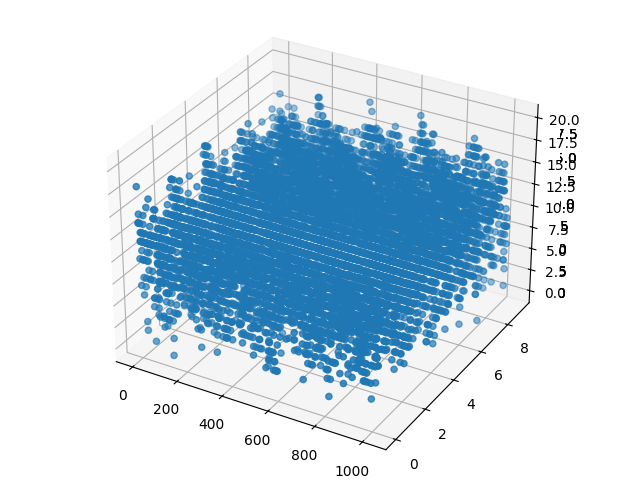

In [16]:
plt.gcf().add_axes((0,0,1,1),projection = '3d').scatter(xs,ys,mlecturas)
plt.show()